In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers
from keras.optimizers import Adam

In [2]:
(x_train, y_tr), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
autoencoder = Sequential()
autoencoder.add(Dense(512, activation="elu", input_shape=(784,)))
autoencoder.add(Dense(128, activation="elu"))
autoencoder.add(Dense(10, activation="linear",name="latinVector"))
autoencoder.add(Dense(128, activation="elu"))
autoencoder.add(Dense(512, activation="elu"))
autoencoder.add(Dense(784, activation="sigmoid"))

autoencoder.compile(loss='mean_squared_error', optimizer=Adam())

In [4]:
model = autoencoder.fit(x_train,x_train, batch_size=1024, epochs=10, verbose=1,
                        validation_data=(val_x, val_x))

Epoch 1/10
59/59 [==============================] - 4s 20ms/step - loss: 0.1095 - val_loss: 0.0491
Epoch 2/10
59/59 [==============================] - 1s 12ms/step - loss: 0.0468 - val_loss: 0.0381
Epoch 3/10
59/59 [==============================] - 1s 12ms/step - loss: 0.0369 - val_loss: 0.0320
Epoch 4/10
59/59 [==============================] - 1s 12ms/step - loss: 0.0314 - val_loss: 0.0276
Epoch 5/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0274 - val_loss: 0.0248
Epoch 6/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0249 - val_loss: 0.0232
Epoch 7/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0232 - val_loss: 0.0219
Epoch 8/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0220 - val_loss: 0.0209
Epoch 9/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0210 - val_loss: 0.0201
Epoch 10/10
59/59 [==============================] - 1s 11ms/step - loss: 0.0203 - val_loss: 0.0194


In [5]:
encoder = Model(autoencoder.input, autoencoder.get_layer('latinVector').output)
encoded_data = encoder.predict(x_train)
encoding_dim = 10

In [6]:
encode_input = Input(shape=(encoding_dim,))

decoder = autoencoder.layers[-3](encode_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encode_input,decoder)

In [7]:
%matplotlib inline
from keras.preprocessing import image

img = image.load_img('/content/mt.png', target_size=(28,28), color_mode='grayscale')
input_img = image.img_to_array(img)
print(input_img.shape)
inputs = input_img.reshape(1,784) / 255

target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

(28, 28, 1)
[6.29273]


In [14]:
check = x_train[5].reshape(1,784)/255

In [19]:
result = autoencoder.predict(check)

In [20]:
import matplotlib.pyplot as plt

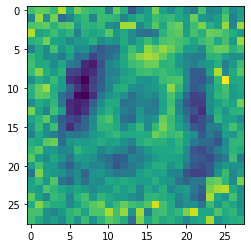

In [21]:
plt.imshow(result.reshape(28,28))

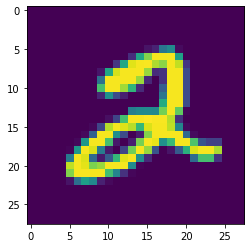

In [23]:
plt.imshow(x_train[5].reshape(28,28))

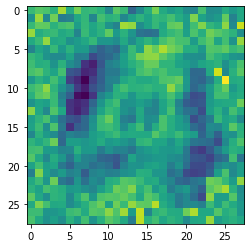

In [24]:
check = x_train[11].reshape(1,784)/255
result = autoencoder.predict(check)
plt.imshow(result.reshape(28,28))